<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_01_WIDS_Prediccion_Energia/blob/main/Scripts/WIDS2022_Prediccion_Energia__EDA_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Programa Data Science WIDS - Prediccion de Energia

Con Python

Sitio del concurso: https://www.kaggle.com/c/widsdatathon2022

Datos: https://drive.google.com/drive/folders/1BxbUc5k1DowoyIvRurX1Iw8ksyIrLzBE?usp=share_link


Deben seguir las instrucciones dadas en el pdf, esto para  
- Ser invitados como colaboradores del repositorio en GitHub
- Abrir la carpeta y hacer un acceso directo en su drive 
- Conectar el Colab con su drive 

Recuerden que deben cambiar la carpeta que será el workspace o las rutas para poder importar los datos.

Finalmente, seguir las instrucciones del pdf para escribir en GitHub los cambios para que se noten sus aportes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Preliminares

In [2]:
import pandas as pd
import numpy as np
import os

In [ ]:
! pip install skimpy

In [ ]:
!pip install -U dataprep

In [7]:
from skimpy import skim
from dataprep.eda import create_report

In [3]:
os.chdir('/content/drive/MyDrive/CURSOS_DICTADOS/TUTORIAS/PrDS_2023_01_WIDS_Prediccion_Energia/')

## EDA

### Importar, corregir Datos y unir

In [4]:
train= pd.read_csv('widsdatathon2022/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

### EDA univariado

Para encontrar qué variables deben ser excluidas del modelo, si se requiere alguna transformación, etc.

In [8]:
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 75757  │ │ int64       │ 37    │                                                          │
│ │ Number of columns │ 64     │ │ float64     │ 24    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA     ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year_Factor             │      0 │     0 │     4.4 │     1.5 │     1 │      3 │       6 │       6 │ ▁▃▄▅▇█ │  │
│ │ floor_area              │      0 │     0 │  170000 │  250000 │   940 │  62000 │  170000 │ 6400000 │   █    │  │
│ │ year_built              │   1800 │   2.4 │    2000 │      37 │     0 │   1900 │    2000 │    2000 │      █ │  │
│ │ energy_star_rating      │  27000 │    35 │      61 │      29 │     0 │     40 │      85 │     100 │ ▃▃▄▅▇█ │  │
│ │ ELEVATION               │      0 │     0 │      40 │      61 │  -6.4 │     12 │      43 │    1900 │   █    │  │
│ │ january_min_temp        │      0 │     0 │      11 │     9.4 │   -19 │      6 │      13 │      49 │  ▁█ ▁  │  │
│ │ january_avg_temp        │      0 │     0 │      34 │       7 │    11 │     30 │      37 │      65 │  ▃█▁▁  │  │
│ │ january_max_temp        │      0 │     0 │      59 │     5.4 │    42 │     56 │      62 │      91 │  ▁▅█▁  │  │
│ │ february_min_temp       │      0 │     0 │      12 │      13 │   -13 │      2 │      20 │      48 │ ▁█▇▃▃▁ │  │
│ │ february_avg_temp       │      0 │     0 │      36 │     8.9 │    13 │     32 │      41 │      65 │ ▁▃█▂▁  │  │
│ │ february_max_temp       │      0 │     0 │      58 │     8.4 │    38 │     55 │      62 │      89 │ ▂ █▂▁  │  │
│ │ march_min_temp          │      0 │     0 │      22 │      10 │    -9 │     13 │      27 │      52 │ ▁▁▅█▁  │  │
│ │ march_avg_temp          │      0 │     0 │      44 │     6.7 │    26 │     38 │      49 │      70 │  █▁▇▁  │  │
│ │ march_max_temp          │      0 │     0 │      71 │     7.7 │    53 │     62 │      78 │      95 │ ▂▆▃█▁  │  │
│ │ april_min_temp          │      0 │     0 │      32 │     5.6 │    15 │     26 │      37 │      52 │  ▅█▄▁▁ │  │
│ │ april_avg_temp          │      0 │     0 │      54 │     2.5 │    40 │     52 │      55 │      74 │   ▁█▁  │  │
│ │ april_max_temp          │      0 │     0 │      83 │     4.1 │    62 │     80 │      87 │     100 │   █▃▁  │  │
│ │ may_min_temp            │      0 │     0 │      45 │     4.2 │    23 │     42 │      49 │      58 │   ▂█▇  │  │
│ │ may_avg_temp            │      0 │     0 │      64 │     2.8 │    47 │     63 │      65 │      82 │    █▄  │  │
│ │ may_max_temp            │      0 │     0 │      89 │     2.9 │    64 │     88 │      91 │     110 │    ▂█  │  │
│ │ june_min_temp           │      0 │     0 │      51 │     3.4 │    30 │     50 │      53 │      68 │   ▁█▁  │  │
│ │ june_avg_temp           │      0 │     0 │      71 │

DataPrep Report
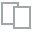
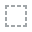
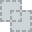
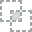
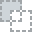
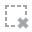
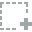
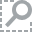
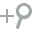
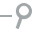
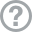
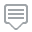
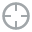
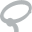
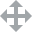
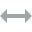
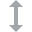
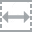
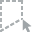
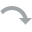
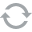
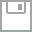
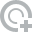
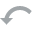
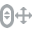
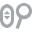
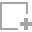
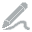
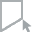
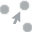
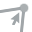
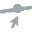

In [9]:
create_report(train)

#### ++ Variables con demasiados NA

#### ++ Variables con varianza cercana a cero

#### Conclusiones

### EDA Multivariado

Para encontrar relaciones entre variables, variables que pueden producir tener multicolinearidad o concurvidad, etc.

#### ++ Variables con alta correlación